# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        
    </li>
    <li> Here in response encoding you need to apply the <strong>laplase smoothing</strong> value for test set. Laplase smoothing means, If test point is present in test but not in train then you need to apply default 0.5 as probability value for that data point (Refer the Response Encoding Image from above cell) </li>
    <li>Please use atleast <strong> 35k </strong> data points </li></ul>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

# Few Notes

1. Use atleast 35k data points
2. Use classifier.Predict_proba() method instead of predict() method while calculating roc_auc scores
3. Be sure that you are using laplase smoothing in response encoding function. Laplase smoothing means applying the default (0.5) value to test data if the test data is not present in the train set


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [2]:
import pandas
data = pandas.read_csv('preprocessed_data.csv',nrows = 35000)
data.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [3]:
from tqdm import tqdm
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer= SentimentIntensityAnalyzer()
negative = []
positive = []
neutral = []
compound = []
for i in data['essay']:
  j= analyzer.polarity_scores(i)['neg']
  k= analyzer.polarity_scores(i)['pos']
  l= analyzer.polarity_scores(i)['neu']
  m = analyzer.polarity_scores(i)['compound']

  negative.append(j)  
  positive.append(k)
  neutral.append(l)  
  compound.append(m)    


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
data['s_negative']= negative
data['s_positive']= positive
data['s_neutral']= neutral
data['s_compound']= compound


In [5]:
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,s_negative,s_positive,s_neutral,s_compound
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,0.013,0.205,0.783,0.9867
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,0.072,0.248,0.680,0.9897


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [6]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [7]:
x=data.drop(['project_is_approved'],axis=1)
y=data['project_is_approved'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [9]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h3> TfIdf

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 10)

vectorizer.fit(X_train['essay'].values)
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf  = vectorizer.transform(X_test['essay'].values)

print(X_train_essay_tfidf.shape)
print(X_test_essay_tfidf.shape)

(24500, 9126)
(10500, 9126)


<h3> Tfidf-W2V

In [11]:
import pickle
with open ('glove_vectors','rb') as f:
  model = pickle.load(f)
  glove_words = set(model.keys())

In [12]:
import numpy as np
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
tfidf_w2v_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
  vector = np.zeros(300) # as word vectors are of zero length
  tf_idf_weight =0; # num of words with a valid vector in the sentence/review
  for word in sentence.split(): # for each word in a review/sentence
    if (word in glove_words) and (word in tfidf_words):
      vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
      tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
      vector += (vec * tf_idf) # calculating tfidf weighted w2v
      tf_idf_weight += tf_idf
  if tf_idf_weight != 0:
    vector /= tf_idf_weight
  tfidf_w2v_train.append(vector)

print(len(tfidf_w2v_train))
print(len(tfidf_w2v_train[0]))

100%|██████████| 24500/24500 [00:59<00:00, 408.65it/s]

24500
300


In [14]:
tfidf_w2v_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
  vector = np.zeros(300) # as word vectors are of zero length
  tf_idf_weight =0; # num of words with a valid vector in the sentence/review
  for word in sentence.split(): # for each word in a review/sentence
    if (word in glove_words) and (word in tfidf_words):
      vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
      tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
      vector += (vec * tf_idf) # calculating tfidf weighted w2v
      tf_idf_weight += tf_idf
  if tf_idf_weight != 0:
    vector /= tf_idf_weight
  tfidf_w2v_test.append(vector)

print(len(tfidf_w2v_test))
print(len(tfidf_w2v_test[0]))

100%|██████████| 10500/10500 [00:25<00:00, 407.79it/s]

10500
300


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [15]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h3> Categorical Features

In [16]:
def get_gv_fea_dict(alpha, feature, df):
   
    value_count = X_train[feature].value_counts()
    gv_dict = dict()
    for i, denominator in value_count.items():
      vec = []
      for k in range(0,2):
        cls_cnt = X_train.loc[('project_is_approved'==k) & (X_train[feature]==i)]
        vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 20*alpha))
      gv_dict[i]=vec
    return gv_dict

def get_gv_feature(alpha, feature, df):
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    value_count = X_train[feature].value_counts()
    gv_fea = []
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/2,1/2])
    return gv_fea

<h4> Teacher Prefix

In [17]:
import numpy as np
alpha = 1
X_train_teacher_prefix_rc = np.array(get_gv_feature(alpha,'teacher_prefix',X_train))
X_test_teacher_prefix_rc = np.array(get_gv_feature(alpha,'teacher_prefix',X_test))

print(X_train_teacher_prefix_rc.shape)
print(X_test_teacher_prefix_rc.shape)


(24500, 2)
(10500, 2)


<h4>Project Grade Category<h4>

In [18]:
X_train_grade_rc =  np.array(get_gv_feature(alpha,'project_grade_category',X_train))
X_test_grade_rc =  np.array(get_gv_feature(alpha,'project_grade_category',X_test))

print(X_train_grade_rc.shape)
print(X_test_grade_rc.shape)

(24500, 2)
(10500, 2)


<h4> School State <h4>

In [19]:
X_train_state_rc =  np.array(get_gv_feature(alpha,'school_state',X_train))
X_test_state_rc = np.array(get_gv_feature(alpha,'school_state',X_test))

print(X_train_state_rc.shape)
print(X_test_state_rc.shape)

(24500, 2)
(10500, 2)


<h4> Clean Categories <h4>

In [20]:
X_train_clean_categories_rc = np.array(get_gv_feature(alpha,'clean_categories',X_train))
X_test_clean_categories_rc = np.array(get_gv_feature(alpha,'clean_categories',X_test))

print(X_train_clean_categories_rc.shape)
print(X_test_clean_categories_rc.shape)

(24500, 2)
(10500, 2)


<h4> Clean Subcategories<h4>

In [21]:
X_train_clean_subcategories_rc= np.array(get_gv_feature(alpha,'clean_subcategories',X_train))
X_test_clean_subcategories_rc = np.array(get_gv_feature(alpha,'clean_subcategories',X_test))

print(X_train_clean_subcategories_rc.shape)
print(X_test_clean_subcategories_rc.shape)

(24500, 2)
(10500, 2)


<h3> Numerical Encoding

<h4> Price <h4>

In [22]:
from sklearn.preprocessing import Normalizer
normalizer =Normalizer()

normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price = normalizer.transform(X_test['price'].values.reshape(-1,1))

print(X_train_price.shape,y_train.shape)
print(X_test_price.shape,y_test.shape)

(24500, 1) (24500,)
(10500, 1) (10500,)


<h4> Teacher number of previously posted projects <h4>

In [23]:
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_teacher_projects = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_projects = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(X_train_teacher_projects.shape,y_train.shape)
print(X_test_teacher_projects.shape,y_test.shape)

(24500, 1) (24500,)
(10500, 1) (10500,)


<h4> Sentiment Negative <h4>

In [24]:
normalizer.fit(X_train['s_negative'].values.reshape(-1,1))

X_train_s_negative=normalizer.transform(X_train['s_negative'].values.reshape(-1,1))
X_test_s_negative=normalizer.transform(X_test['s_negative'].values.reshape(-1,1))

print(X_train_s_negative.shape,y_train.shape)
print(X_test_s_negative.shape,y_test.shape)

(24500, 1) (24500,)
(10500, 1) (10500,)


<h4> Sentiment Positive <h4>

In [25]:
normalizer.fit(X_train['s_positive'].values.reshape(-1,1))

X_train_s_positive=normalizer.transform(X_train['s_positive'].values.reshape(-1,1))
X_test_s_positive=normalizer.transform(X_test['s_positive'].values.reshape(-1,1))

print(X_train_s_positive.shape,y_train.shape)
print(X_test_s_positive.shape,y_test.shape)

(24500, 1) (24500,)
(10500, 1) (10500,)


<h4> Sentiment Neutral <h4>

In [26]:
normalizer.fit(X_train['s_neutral'].values.reshape(-1,1))

X_train_s_neutral=normalizer.transform(X_train['s_neutral'].values.reshape(-1,1))
X_test_s_neutral=normalizer.transform(X_test['s_neutral'].values.reshape(-1,1))

print(X_train_s_neutral.shape,y_train.shape)
print(X_test_s_neutral.shape,y_test.shape)

(24500, 1) (24500,)
(10500, 1) (10500,)


<h4> Sentiment Compound <h4>

In [27]:
normalizer.fit(X_train['s_compound'].values.reshape(-1,1))

X_train_s_compound=normalizer.transform(X_train['s_compound'].values.reshape(-1,1))
X_test_s_compound=normalizer.transform(X_test['s_compound'].values.reshape(-1,1))

print(X_train_s_compound.shape,y_train.shape)
print(X_test_s_compound.shape,y_test.shape)

(24500, 1) (24500,)
(10500, 1) (10500,)


<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

<h4> Hyperparameter Tuning

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [31]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h3> Stacking features

<h4> Set 1

In [32]:
from scipy.sparse import hstack
X_train_set_1 = hstack((X_train_essay_tfidf,X_train_teacher_prefix_rc,X_train_grade_rc,X_train_state_rc,X_train_clean_categories_rc,X_train_clean_subcategories_rc,X_train_price,X_train_teacher_projects,X_train_s_negative,X_train_s_positive,X_train_s_neutral,X_train_s_compound)).tocsr()
X_test_set_1 = hstack((X_test_essay_tfidf,X_test_teacher_prefix_rc,X_test_grade_rc,X_test_state_rc,X_test_clean_categories_rc,X_test_clean_subcategories_rc,X_test_price,X_test_teacher_projects,X_test_s_negative,X_test_s_positive,X_test_s_neutral,X_test_s_compound)).tocsr()

print('Final Data Matrix')
print(X_train_set_1.shape,y_train.shape)
print(X_test_set_1.shape,y_test.shape)

Final Data Matrix
(24500, 9142) (24500,)
(10500, 9142) (10500,)


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(verbose=3)
parameters= {
    'max_depth' : [5, 10, 20, 30, 50],
    'n_estimators' :  [10, 25, 50, 100, 250]
    }
clf= GridSearchCV(model,param_grid=parameters,cv=10,scoring= 'roc_auc',return_train_score=True)
clf.fit(X_train_set_1,y_train)


      Iter       Train Loss   Remaining Time 
         1           0.8522           15.57s
         2           0.8431           13.69s
         3           0.8358           11.85s
         4           0.8289           10.13s
         5           0.8224            8.39s
         6           0.8170            6.70s
         7           0.8121            5.00s
         8           0.8071            3.33s
         9           0.8023            1.66s
        10           0.7976            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8526           15.33s
         2           0.8430           13.69s
         3           0.8357           11.84s
         4           0.8289           10.09s
         5           0.8227            8.36s
         6           0.8171            6.68s
         7           0.8120            4.99s
         8           0.8074            3.32s
         9           0.8022            1.66s
        10           0.7977            0.00s
      It

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(verbose=3),
             param_grid={'max_depth': [5, 10, 20, 30, 50],
                         'n_estimators': [10, 20]},
             return_train_score=True, scoring='roc_auc')

In [34]:
print('Best score : ',clf.best_score_ )
print('Best parameters : ',clf.best_params_)

Best score :  0.6644500423964221
Best parameters :  {'max_depth': 5, 'n_estimators': 20}


In [35]:
train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std = clf.cv_results_['std_test_score']

<h4> 3D Plot

In [36]:
import plotly.offline as offline
import plotly.graph_objs as go
import matplotlib.pyplot as plt
max_depth= [5, 10, 20, 30, 50],
n_estimators = [10, 25, 50, 100, 250]
x1= n_estimators
y1 =max_depth
z1= train_auc
z2 = cv_auc

trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'Train')
trace2 = go.Scatter3d(x=x1,y=y1,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='min_samples_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')
fig.show()
plt.show()

<h4> ROC-AUC Curve

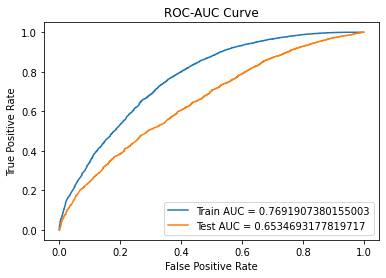

In [40]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

gbdt = GradientBoostingClassifier(max_depth= 5, n_estimators= 20 )
clf_1 = gbdt.fit(X_train_set_1,y_train)

y_train_pred = clf_1.predict_proba(X_train_set_1)[:,1]
y_test_pred = clf_1.predict_proba(X_test_set_1)[:,1]

train_fpr,train_tpr,train_threshold = roc_curve(y_train,y_train_pred)
test_fpr,test_tpr,test_threshold = roc_curve(y_test,y_test_pred)
Train_auc = auc(train_fpr,train_tpr)
Test_auc = auc (test_fpr,test_tpr)

plt.plot(train_fpr,train_tpr,label= 'Train AUC = '+str(Train_auc))
plt.plot(test_fpr,test_tpr,label= 'Test AUC = '+str(Test_auc))
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.show()

<h4> Confusion Matrix

In [40]:
def find_best_threshold(threshold,fpr,tpr):
  t=threshold[np.argmax(tpr*(1-fpr))]
  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
  return t  

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.4897376774395234 for threshold 0.837
Train Data Confusion Matrix


Text(0.5, 1.0, 'Train Data Confusion Matrix')

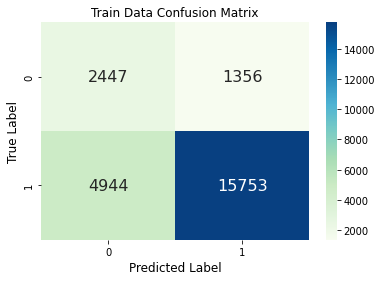

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

best_t = find_best_threshold(train_threshold,train_fpr,train_tpr)
train_predictions = predict_with_best_t(y_train_pred,best_t)
cm1= confusion_matrix(y_train,train_predictions)

print("Train Data Confusion Matrix")

sns.heatmap(cm1, annot=True, fmt='d',cmap='GnBu',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Train Data Confusion Matrix',size=12)

the maximum value of tpr*(1-fpr) 0.3661575383624117 for threshold 0.854
Test Data Confusion Matrix


Text(0.5, 1.0, 'Test Data Confusion Matrix')

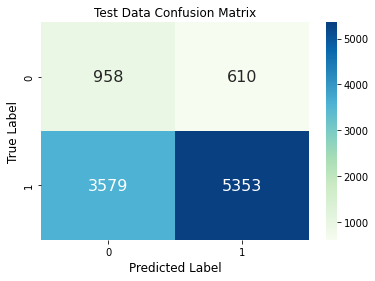

In [44]:
best_t = find_best_threshold(test_threshold, test_fpr, test_tpr)
test_predictions=predict_with_best_t(y_test_pred, best_t)
cm=confusion_matrix(y_test, test_predictions) 

print("Test Data Confusion Matrix")

sns.heatmap(cm, annot=True, fmt='d',cmap='GnBu',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Test Data Confusion Matrix',size=12)

<h3> Set 2

In [28]:
from scipy.sparse import hstack
from scipy import sparse
X_train_set_2 = hstack((sparse.csr_matrix(tfidf_w2v_train)[0:24500,:],sparse.csr_matrix(X_train_teacher_prefix_rc)[0:24500,:],sparse.csr_matrix(X_train_grade_rc)[0:24500,:],sparse.csr_matrix(X_train_state_rc)[0:24500,:],sparse.csr_matrix(X_train_clean_categories_rc)[0:24500,:],sparse.csr_matrix(X_train_clean_subcategories_rc)[0:24500,:],sparse.csr_matrix(X_train_price)[0:24500,:],sparse.csr_matrix(X_train_teacher_projects)[0:24500,:],sparse.csr_matrix(X_train_s_negative)[0:24500,:],sparse.csr_matrix(X_train_s_positive)[0:24500,:],sparse.csr_matrix(X_train_s_neutral)[0:24500,:],sparse.csr_matrix(X_train_s_compound)[0:24500,:])).tocsr()
X_test_set_2 = hstack((sparse.csr_matrix(tfidf_w2v_test)[0:10500,:],sparse.csr_matrix(X_test_teacher_prefix_rc)[0:10500,:],sparse.csr_matrix(X_test_grade_rc)[0:10500,:],sparse.csr_matrix(X_test_state_rc)[0:10500,:],sparse.csr_matrix(X_test_clean_categories_rc)[0:10500,:],sparse.csr_matrix(X_test_clean_subcategories_rc)[0:10500,:],sparse.csr_matrix(X_test_price)[0:10500,:],sparse.csr_matrix(X_test_teacher_projects)[0:10500,:],sparse.csr_matrix(X_test_s_negative)[0:10500,:],sparse.csr_matrix(X_test_s_positive)[0:10500,:],sparse.csr_matrix(X_test_s_neutral)[0:10500,:],sparse.csr_matrix(X_test_s_compound)[0:10500,:])).tocsr()

print('Final Data Matrix')
print(X_train_set_2.shape,y_train.shape)
print(X_test_set_2.shape,y_test.shape)

Final Data Matrix
(24500, 316) (24500,)
(10500, 316) (10500,)


<h4> Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import plotly.offline as offline
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [32]:
model = GradientBoostingClassifier()
parameters= {
    'max_depth' : [5, 10, 20],
    'n_estimators' : [10, 25, 50]
}
clf_2= GridSearchCV(model,param_grid=parameters,cv=3,scoring= 'roc_auc',return_train_score=True)
clf_2.fit(X_train_set_2,y_train)


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [10, 25, 50]},
             return_train_score=True, scoring='roc_auc')

In [33]:
print('Best score : ',clf_2.best_score_ )
print('Best parameters : ',clf_2.best_params_)

Best score :  0.6796642783721843
Best parameters :  {'max_depth': 5, 'n_estimators': 50}


In [34]:
train_auc = clf_2.cv_results_['mean_train_score']
train_auc_std = clf_2.cv_results_['std_train_score']
cv_auc = clf_2.cv_results_['mean_test_score']
cv_auc_std = clf_2.cv_results_['std_test_score']

<h4> 3D Plot

In [35]:
max_depth=[5, 10, 20]
n_estimators = [10, 25, 50]
x1= n_estimators
y1 = max_depth
z1= train_auc
z2 = cv_auc

trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'Train')
trace2 = go.Scatter3d(x=x1,y=y1,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')
fig.show()
plt.show()

<h4> ROC-AUC Curve

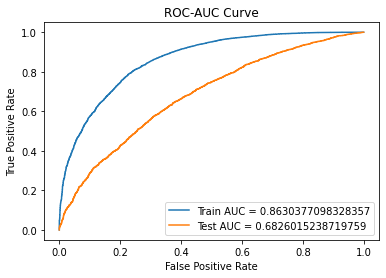

In [38]:
gbdt = GradientBoostingClassifier(max_depth= 5 , n_estimators=50 )
clf_2 = gbdt.fit(X_train_set_2,y_train)

y_train_pred = clf_2.predict_proba(X_train_set_2)[:,1]
y_test_pred = clf_2.predict_proba(X_test_set_2)[:,1]

train_fpr,train_tpr,train_threshold = roc_curve(y_train,y_train_pred)
test_fpr,test_tpr,test_threshold = roc_curve(y_test,y_test_pred)

Train_auc = auc(train_fpr,train_tpr)
Test_auc = auc (test_fpr,test_tpr)

plt.plot(train_fpr,train_tpr,label= 'Train AUC = '+str(Train_auc))
plt.plot(test_fpr,test_tpr,label= 'Test AUC = '+str(Test_auc))
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.show()

<h4> Confusion Matrix

the maximum value of tpr*(1-fpr) 0.60961896523053 for threshold 0.822
Train Data Confusion Matrix


Text(0.5, 1.0, 'Train Data Confusion Matrix')

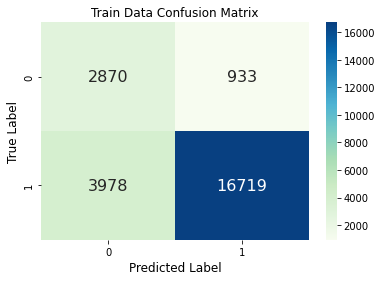

In [42]:
best_t = find_best_threshold(train_threshold,train_fpr,train_tpr)
train_predictions = predict_with_best_t(y_train_pred,best_t)
cm1= confusion_matrix(y_train,train_predictions)

print("Train Data Confusion Matrix")

sns.heatmap(cm1, annot=True, fmt='d',cmap='GnBu',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Train Data Confusion Matrix',size=12)

the maximum value of tpr*(1-fpr) 0.4024058333028689 for threshold 0.849
Test Data Confusion Matrix


Text(0.5, 1.0, 'Test Data Confusion Matrix')

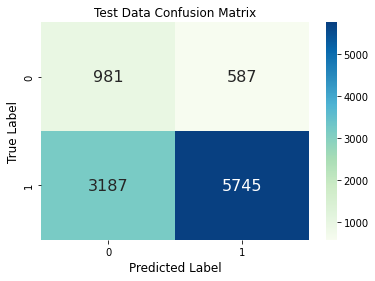

In [43]:
best_t = find_best_threshold(test_threshold, test_fpr, test_tpr)
test_predictions=predict_with_best_t(y_test_pred, best_t)
cm=confusion_matrix(y_test, test_predictions) 

print("Test Data Confusion Matrix")

sns.heatmap(cm, annot=True, fmt='d',cmap='GnBu',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Test Data Confusion Matrix',size=12)

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [46]:
from prettytable import PrettyTable
from prettytable import ALL
table =PrettyTable(hrules=ALL)
table.field_names= ['SL. NO','Vectorizer','Model','Hyperparameter','Test-AUC']
table.add_row([1,'TF-IDF','GBDT ','max_depth= 5, n_estimators= 20','0.6534'])
table.add_row([2,'TF-IDF W2V','GBDT','max_depth= 5, n_estimators= 50','0.6826'])
print(table)

+--------+------------+-------+--------------------------------+----------+
| SL. NO | Vectorizer | Model |         Hyperparameter         | Test-AUC |
+--------+------------+-------+--------------------------------+----------+
|   1    |   TF-IDF   | GBDT  | max_depth= 5, n_estimators= 20 |  0.6534  |
+--------+------------+-------+--------------------------------+----------+
|   2    | TF-IDF W2V |  GBDT | max_depth= 5, n_estimators= 50 |  0.6826  |
+--------+------------+-------+--------------------------------+----------+
